In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path= r"C:\Users\DELL\Data-Visualization\raw_data\train.csv"
df = pd.read_csv(path)

Dữ liệu thô

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172206 entries, 0 to 172205
Columns: 122 entries, ID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 160.3+ MB


In [39]:
df.describe()

,ID,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,172206.000000,172206.000000,172206.000000,1.722060e+05,1.722060e+05,172200.000000,1.720640e+05,172206.000000,172206.000000,172206.000000,...,172206.000000,172206.000000,172206.000000,172206.000000,148988.000000,148988.000000,148988.000000,148988.000000,148988.000000,148988.000000
mean,107656.637934,0.081037,0.416193,1.690070e+05,5.989697e+05,27108.623963,5.382994e+05,0.020845,-16044.098301,64017.353089,...,0.007874,0.000563,0.000470,0.000337,0.006591,0.007202,0.034265,0.267565,0.264055,1.895569
std,62125.300732,0.272892,0.723704,3.023230e+05,4.022347e+05,14464.865791,3.693063e+05,0.013823,4372.994174,141446.397317,...,0.088387,0.023727,0.021683,0.018349,0.085907,0.114031,0.207197,0.920012,0.611323,1.867183
min,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17546.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53908.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19695.000000,-2762.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107747.500000,0.000000,0.000000,1.440000e+05,5.130000e+05,24930.000000,4.500000e+05,0.018850,-15756.500000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,161482.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34618.500000,6.795000e+05,0.028663,-12409.000000,-287.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,215257.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,8.000000,25.000000


Những cột cần xử lí

In [6]:
cols_group1 = ['TARGET','ID' ,'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START'
]
df_prep = df[cols_group1]


In [7]:
df_prep.describe()

,TARGET,ID,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,172206.000000,172206.000000,1.722060e+05,1.722060e+05,172200.000000,1.720640e+05,172206.000000
mean,0.081037,107656.637934,1.690070e+05,5.989697e+05,27108.623963,5.382994e+05,12.070050
std,0.272892,62125.300732,3.023230e+05,4.022347e+05,14464.865791,3.693063e+05,3.264545
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000000
25%,0.000000,53908.250000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,107747.500000,1.440000e+05,5.130000e+05,24930.000000,4.500000e+05,12.000000
75%,0.000000,161482.750000,2.025000e+05,8.086500e+05,34618.500000,6.795000e+05,14.000000
max,1.000000,215257.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [9]:
for col in cols_group1:
    print(f'\n -----Tổng giá trị của biến: {df_prep[col].value_counts(ascending = False)}')
    


 -----Tổng giá trị của biến: TARGET
0    158251
1     13955
Name: count, dtype: int64

 -----Tổng giá trị của biến: ID
214476    1
191461    1
17689     1
116834    1
127008    1
         ..
57925     1
41545     1
213380    1
168169    1
183824    1
Name: count, Length: 172206, dtype: int64

 -----Tổng giá trị của biến: NAME_CONTRACT_TYPE
Cash loans         155917
Revolving loans     16289
Name: count, dtype: int64

 -----Tổng giá trị của biến: NAME_TYPE_SUITE
Unaccompanied      139128
Family              22493
Spouse, partner      6425
Children             1827
Other_B               960
Other_A               476
Group of people       161
Name: count, dtype: int64

 -----Tổng giá trị của biến: WEEKDAY_APPR_PROCESS_START
TUESDAY      30114
WEDNESDAY    29050
THURSDAY     28478
MONDAY       28402
FRIDAY       28129
SATURDAY     19026
SUNDAY        9007
Name: count, dtype: int64

 -----Tổng giá trị của biến: AMT_INCOME_TOTAL
135000.0    20146
112500.0    17372
157500.0    14823
180000.0

## **1. DISTRIBUTION**

In [34]:
# PHÂN LOẠI CÁC BIẾN 
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START'
]
continuous_numerical_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT', 
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'
]
discrete_numerical_cols=['HOUR_APPR_PROCESS_START']

### **1.1 Categorical features**

C:\Users\DELL\AppData\Local\Temp\ipykernel_3652\1906854876.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prep, y=col, ax=ax, order=order,
C:\Users\DELL\AppData\Local\Temp\ipykernel_3652\1906854876.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prep, y=col, ax=ax, order=order,
C:\Users\DELL\AppData\Local\Temp\ipykernel_3652\1906854876.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prep, y=col, ax=ax, order=order,


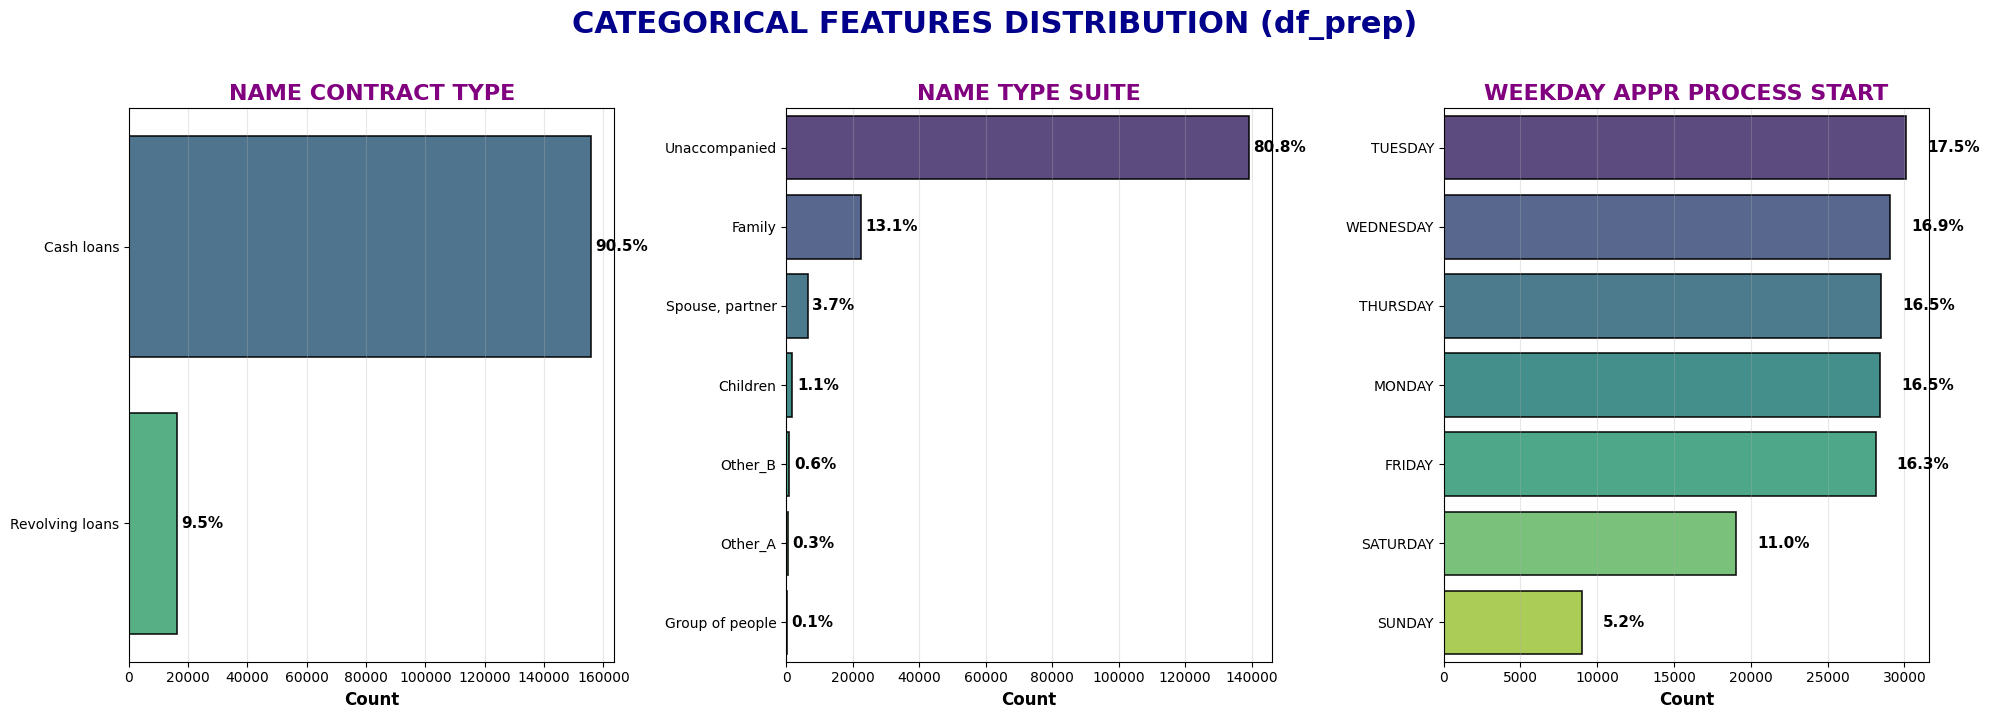

In [ ]:
# === CATEGORICAL FEATURES ===
# TARGET vẽ riêng vì nó là biến mục tiêu → cần highlight tỷ lệ vỡ nợ
target_col = 'TARGET'

# === 1. Vẽ các biến categorical ===
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    order = df_prep[col].value_counts().index
    sns.countplot(data=df_prep, y=col, ax=ax, order=order,
                  palette='viridis', alpha=0.9, edgecolor='black', linewidth=1.2)
    
    total = len(df_prep)
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        x = p.get_width() + total * 0.008
        y = p.get_y() + p.get_height()/2
        ax.text(x, y, percentage, va='center', ha='left', fontsize=11, fontweight='bold')
    
    ax.set_title(f'{col.replace("_", " ")}', fontsize=16, fontweight='bold', color='purple')
    ax.set_xlabel('Count', fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    ax.grid(True, axis='x', alpha=0.3)

plt.suptitle('CATEGORICAL FEATURES DISTRIBUTION (df_prep)', 
             fontsize=22, fontweight='bold', color='darkblue', y=1.02)
plt.tight_layout()
plt.show()

### **1.2 Continuos Numerical features**

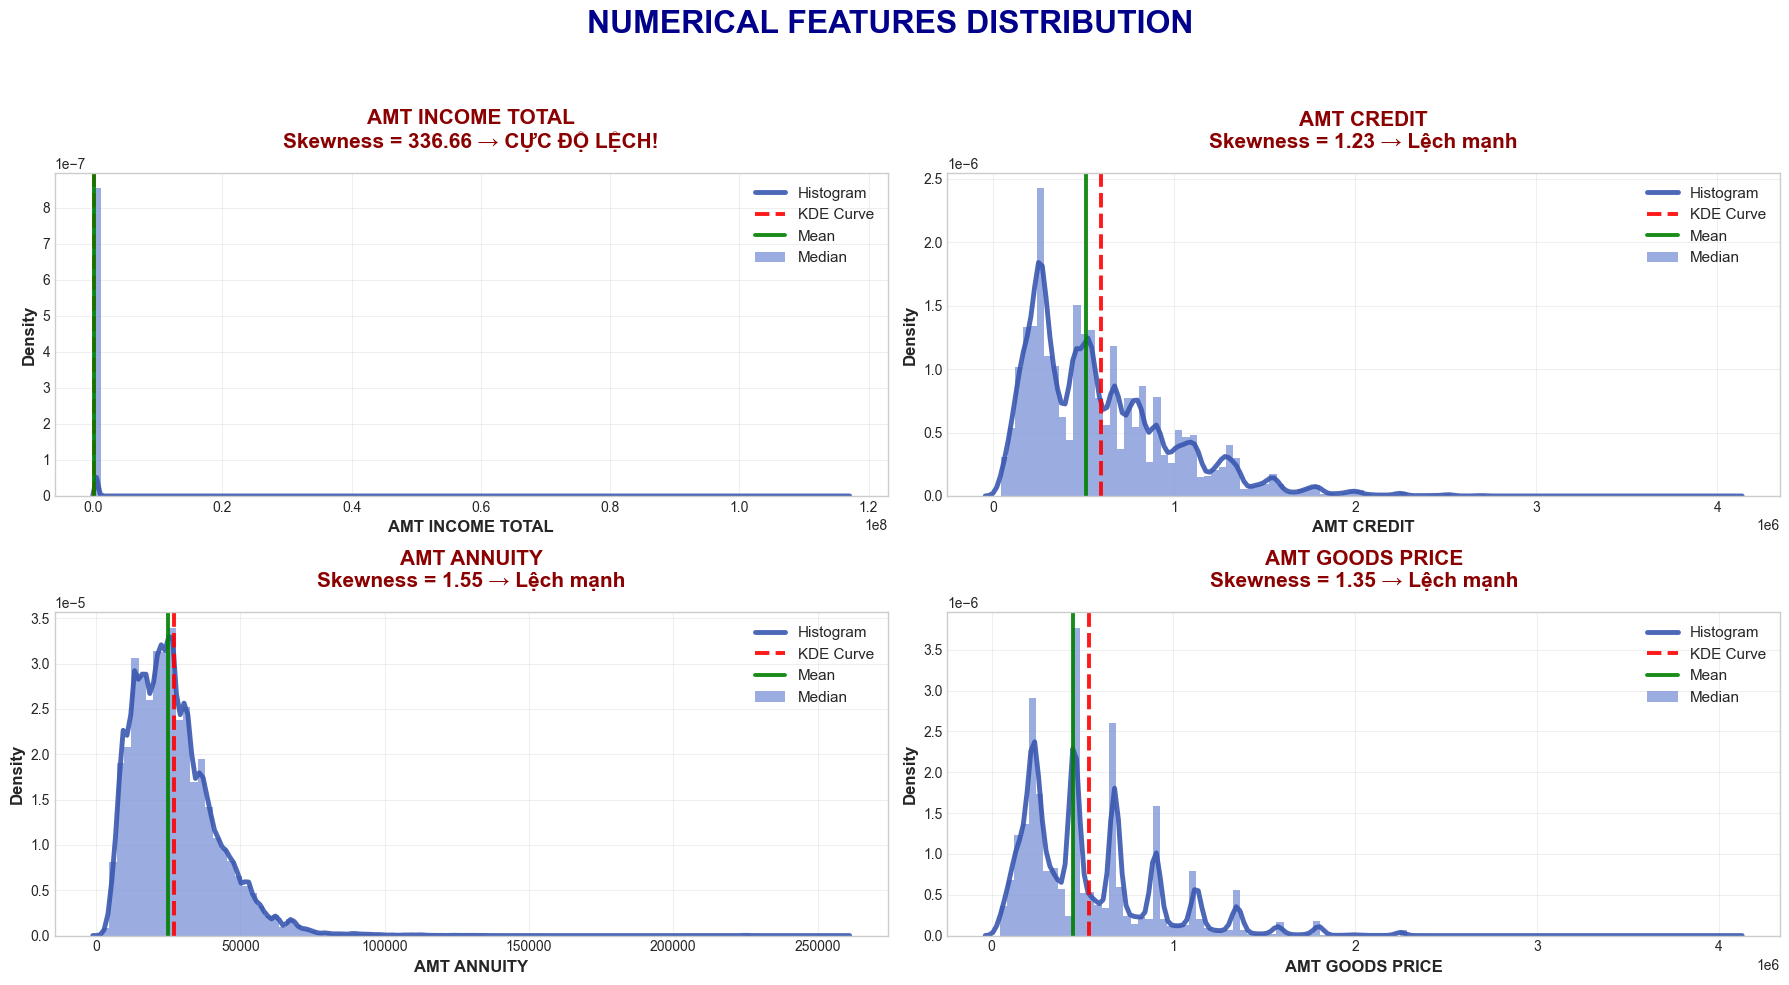

In [ ]:

# === BIẾN CONTINUOS NUMERICAL ===
# Chuyển đổi sang dạng số (đảm bảo trước khi tính toán thống kê)
for col in continuous_numerical_cols:
    df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')

n_cols = 2 
n_rows = 2 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.ravel() 

for i, col in enumerate(continuous_numerical_cols):
    ax = axes[i]
    
    # 1. Vẽ Histogram (Density)
    sns.histplot(data=df_prep, x=col, ax=ax, 
                 color="#7A92D6", alpha=0.75,
                 bins=100, linewidth=0, kde=False, stat="density", label='Histogram')

    # 2. Vẽ KDE (Density Curve)
    sns.kdeplot(data=df_prep, x=col, ax=ax, 
                color="#3957B0", linewidth=3.5, 
                bw_adjust=0.8, alpha=0.9, label='KDE (Density Curve)')
    
    # 3. Mean & Median
    mean_val = df_prep[col].mean()
    median_val = df_prep[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2.8, alpha=0.9)
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2.8, alpha=0.9)
    
    # 4. Skewness
    skew_val = df_prep[col].skew()
    skew_text = f'Skewness = {skew_val:.2f}'
    
    # Đánh giá mức độ lệch
    if abs(skew_val) > 10:
        skew_text += ' → Cực độ lệch'
    elif abs(skew_val) > 1:
        skew_text += ' → Lệch mạnh'
    else:
        skew_text += ' → Gần chuẩn'
    
    # Màu tiêu đề dựa trên độ lệch
    title_color = 'darkred' if abs(skew_val) > 1 else 'navy'
    
    # 5. Tiêu đề & Nhãn
    ax.set_title(f'{col.replace("_", " ")}\n{skew_text}', 
                 fontsize=15, fontweight='bold', color=title_color, pad=18)
    
    ax.set_xlabel(col.replace('_', ' '), fontsize=12, fontweight='bold')
    ax.set_ylabel('Density', fontsize=12, fontweight='bold')  
    ax.grid(True, alpha=0.3)
 
    # 6. Legend
    ax.legend(['Histogram', 'KDE Curve', 'Mean', 'Median'], 
              fontsize=11, loc='upper right', fancybox=True, shadow=True)

plt.suptitle('NUMERICAL FEATURES DISTRIBUTION ', 
             fontsize=23, fontweight='bold', color='darkblue', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

Sau khi transform các biến continuos numerical

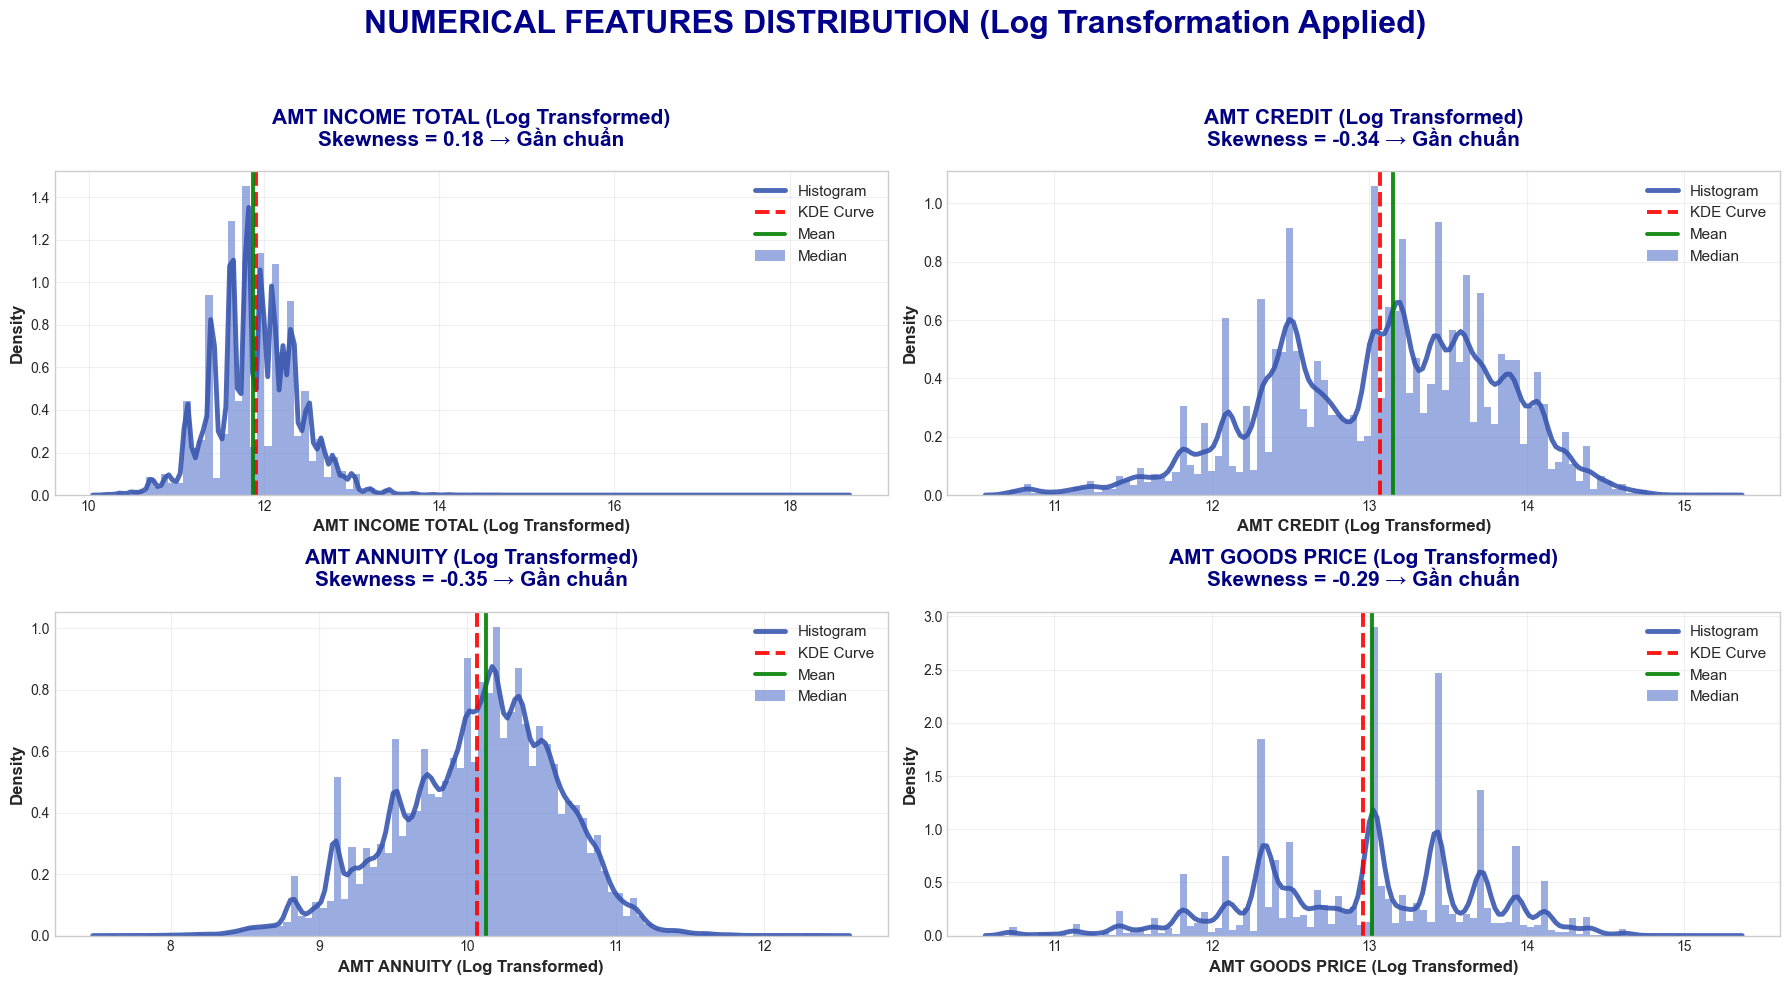

In [ ]:

for col in continuous_numerical_cols:
    # Đảm bảo cột là số trước khi biến đổi
    df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')
    # Sử dụng np.log1p để giảm độ lệch, an toàn với giá trị 0
    df_prep[f'{col}_LOG'] = np.log1p(df_prep[col].fillna(0))

# DANH SÁCH CỘT MỚI ĐỂ VẼ BIỂU ĐỒ (Chỉ 4 cột đã Log)
numerical_cols_transformed = [f'{col}_LOG' for col in continuous_numerical_cols]

# VẼ BIỂU ĐỒ CHO CÁC CỘT MỚI
n_cols = 2
n_rows = 2 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_transformed):
    ax = axes[i]
    
    # 1. Vẽ Histogram
    sns.histplot(data=df_prep, x=col, ax=ax, 
                 color="#7A92D6", alpha=0.75,
                 bins=100, linewidth=0, kde=False, stat="density", label='Histogram')

    # 2. Vẽ KDE (Density Curve)
    sns.kdeplot(data=df_prep, x=col, ax=ax, 
                color="#3957B0", linewidth=3.5, 
                bw_adjust=0.8, alpha=0.9, label='KDE (Density Curve)')
    
    # 3. Mean & Median
    mean_val = df_prep[col].mean()
    median_val = df_prep[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2.8, alpha=0.9)
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2.8, alpha=0.9)
    
    # 4. Skewness
    skew_val = df_prep[col].skew()
    skew_text = f'Skewness = {skew_val:.2f}'
    
    # Cập nhật đánh giá độ lệch dựa trên giá trị mới (sau Log)
    if abs(skew_val) > 1:
        skew_text += ' → Lệch mạnh'
    elif abs(skew_val) > 0.5:
        skew_text += ' → Lệch vừa'
    else:
        skew_text += ' → Gần chuẩn'
        
    title_color = 'darkred' if abs(skew_val) > 1 else 'navy'
    
    # Cập nhật tiêu đề để phản ánh biến đổi Log
    display_name = col.replace("_", " ").replace(" LOG", " (Log Transformed)")
    ax.set_title(f'{display_name}\n{skew_text}', 
                 fontsize=15, fontweight='bold', color=title_color, pad=18)
    
    ax.set_xlabel(display_name, fontsize=12, fontweight='bold')
    ax.set_ylabel('Density', fontsize=12, fontweight='bold')  
    ax.grid(True, alpha=0.3)
    
    # 5. Legend
    ax.legend(['Histogram', 'KDE Curve', 'Mean', 'Median'], 
              fontsize=11, loc='upper right', fancybox=True, shadow=True)

plt.suptitle('NUMERICAL FEATURES DISTRIBUTION (Log Transformation Applied)', 
             fontsize=23, fontweight='bold', color='darkblue', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

### **1.3 Decrete Numerical features**


=== HOUR_APPR_PROCESS_START DISTRIBUTION ===
HOUR_APPR_PROCESS_START
0        24
1        45
2       161
3       697
4      1150
5      2029
6      3281
7      5051
8      8453
9     15310
10    21203
11    20758
12    19142
13    17348
14    15572
15    14003
16    11330
17     8354
18     5127
19     2179
20      668
21      206
22       90
23       25
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3652\174806035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prep, x='HOUR_APPR_PROCESS_START', palette='viridis')


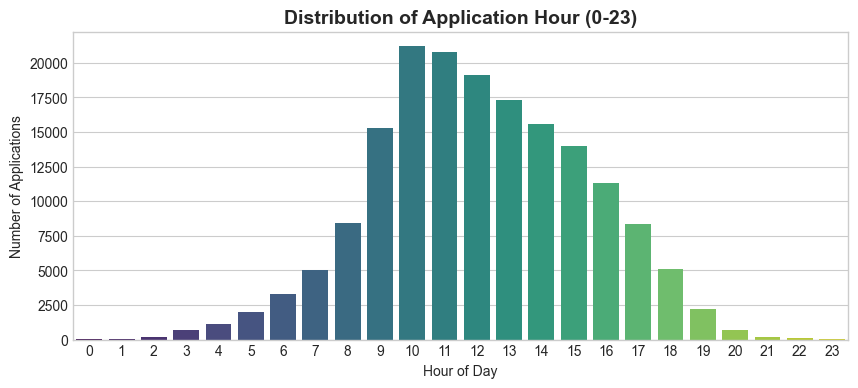

In [53]:
print("\n=== HOUR_APPR_PROCESS_START DISTRIBUTION ===")
hour_dist = df_prep['HOUR_APPR_PROCESS_START'].value_counts().sort_index()
print(hour_dist)

# Visual
plt.figure(figsize=(10,4))
sns.countplot(data=df_prep, x='HOUR_APPR_PROCESS_START', palette='viridis')
plt.title('Distribution of Application Hour (0-23)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Applications')
plt.show()


df_prep['is_morning']   = df_prep['HOUR_APPR_PROCESS_START'].between(6, 11).astype(int)
df_prep['is_afternoon'] = df_prep['HOUR_APPR_PROCESS_START'].between(12, 17).astype(int)
df_prep['is_evening']   = df_prep['HOUR_APPR_PROCESS_START'].between(18, 23).astype(int)
df_prep['is_night']     = df_prep['HOUR_APPR_PROCESS_START'].between(0, 5).astype(int)

## **2. EXPLANATION**

In [16]:

print("=== PHÂN TÍCH MISSING AMT_GOODS_PRICE ===\n")
print(f"Tổng số dòng: {len(df_prep):,}")
print(f"Số missing AMT_GOODS_PRICE: {df_prep['AMT_GOODS_PRICE'].isnull().sum():,} "
      f"({df_prep['AMT_GOODS_PRICE'].isnull().mean()*100:.3f}%)\n")

result = (df_prep.groupby('NAME_CONTRACT_TYPE')
             .agg(
                 Total_rows           = ('ID', 'count'),                    # tổng số dòng
                 Missing_GOODS        = ('AMT_GOODS_PRICE', lambda x: x.isnull().sum()),  # số missing
                 Not_Missing_GOODS    = ('AMT_GOODS_PRICE', lambda x: x.notnull().sum()),# số không missing
             ))

# Tính % missing
result['Percent_Missing'] = (result['Missing_GOODS'] / result['Total_rows'] * 100).round(3)

result = result[['Total_rows', 'Missing_GOODS', 'Not_Missing_GOODS', 'Percent_Missing']]
print(result)

=== PHÂN TÍCH MISSING AMT_GOODS_PRICE ===

Tổng số dòng: 172,206
Số missing AMT_GOODS_PRICE: 142 (0.082%)

                    Total_rows  Missing_GOODS  Not_Missing_GOODS  \
NAME_CONTRACT_TYPE                                                 
Cash loans              155917              0             155917   
Revolving loans          16289            142              16147   

                    Percent_Missing  
NAME_CONTRACT_TYPE                   
Cash loans                    0.000  
Revolving loans               0.872  


In [17]:
print("=== PHÂN TÍCH MISSING AMT_ANNUITY ===\n")
print(f"Tổng số dòng: {len(df_prep):,}")
print(f"Số missing AMT_ANNUITY: {df_prep['AMT_ANNUITY'].isnull().sum():,} "
      f"({df_prep['AMT_ANNUITY'].isnull().mean()*100:.3f}%)\n")

result = (df_prep.groupby('NAME_CONTRACT_TYPE')
             .agg(
                 Total_rows           = ('ID', 'count'),                    # tổng số dòng
                 Missing_ANNUITY        = ('AMT_ANNUITY', lambda x: x.isnull().sum()),  # số missing
                 Not_Missing_ANNUITY   = ('AMT_ANNUITY', lambda x: x.notnull().sum()),# số không missing
             ))

# Tính % missing
result['Percent_Missing'] = (result['Missing_ANNUITY'] / result['Total_rows'] * 100).round(3)

result = result[['Total_rows', 'Missing_ANNUITY', 'Not_Missing_ANNUITY', 'Percent_Missing']]
print(result)

=== PHÂN TÍCH MISSING AMT_ANNUITY ===

Tổng số dòng: 172,206
Số missing AMT_ANNUITY: 6 (0.003%)

                    Total_rows  Missing_ANNUITY  Not_Missing_ANNUITY  \
NAME_CONTRACT_TYPE                                                     
Cash loans              155917                6               155911   
Revolving loans          16289                0                16289   

                    Percent_Missing  
NAME_CONTRACT_TYPE                   
Cash loans                    0.004  
Revolving loans               0.000  


In [18]:
print("TỶ LỆ VỠ NỢ THEO LOẠI KHOẢN VAY\n" + "="*50)

# Tính tỷ lệ TARGET=1 (vỡ nợ) theo từng nhóm
default_rate = df_prep.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100

for contract_type, rate in default_rate.items():
    count = len(df_prep[df_prep['NAME_CONTRACT_TYPE'] == contract_type])
    bad = df_prep[(df_prep['NAME_CONTRACT_TYPE'] == contract_type) & (df_prep['TARGET'] == 1)].shape[0]
    print(f"{contract_type:15} → {rate:5.2f}% vỡ nợ "
          f"({bad:,} người vỡ nợ / {count:,} người)")

TỶ LỆ VỠ NỢ THEO LOẠI KHOẢN VAY
Cash loans      →  8.36% vỡ nợ (13,030 người vỡ nợ / 155,917 người)
Revolving loans →  5.68% vỡ nợ (925 người vỡ nợ / 16,289 người)


### Explain the each features

| Tên biến | Ý nghĩa của biến | Note |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **ID** | Mã định danh duy nhất của mỗi hồ sơ vay                                       | • 100% unique (215258 giá trị khác nhau)<br> |
| **TARGET** | Kết quả cuối cùng ngân hàng quan tâm nhất:<br>• 0 = khách hàng trả nợ đúng hạn<br>• 1 = khách hàng bị trễ nợ quá X ngày trong Y kỳ đầu | • Là biến mục tiêu cần dự đoán<br> |
| **NAME_CONTRACT_TYPE** | Loại khoản vay mà khách hàng chọn:<br>• Cash loans = vay tiền mặt, cầm tiền về xài<br>• Revolving loans = giống thẻ tín dụng, có hạn mức rút dần |• Cash loans chiếm ~90–91%<br>• Revolving loans có tỷ lệ vỡ nợ thấp hơn hẳn (~5–6% so với ~8–9% của Cash loans) → biến mạnh |
| **AMT_INCOME_TOTAL** | Thu nhập hàng tháng do khách hàng tự khai (bao gồm lương, kinh doanh, cho thuê…) | • Bị lệch phải cực mạnh (max = 117 triệu!)<br>• Người default thường thu nhập thấp hơn 20–30%<br>• Bắt buộc log transform<br>• Nên tạo tỷ lệ với CREDIT/ANNUITY |
| **AMT_CREDIT** | Số tiền ngân hàng thực tế duyệt và cho vay (sau khi xét hồ sơ) | • Bị lệch phải mạnh<br>• Người default thường được duyệt ít tiền hơn<br>• Tỷ lệ CREDIT/INCOME là một trong những feature mạnh nhất cuộc thi |
| **AMT_ANNUITY** | Số tiền khách phải trả cố định mỗi tháng (gồm cả gốc và lãi) | • Bị lệch phải<br>• Tỷ lệ ANNUITY/INCOME (gánh nặng trả góp) là feature cực mạnh<br>• Càng cao → càng dễ vỡ nợ |
| **AMT_GOODS_PRICE** | Giá trị món hàng mà khách định mua bằng tiền vay (tivi, tủ lạnh, điện thoại…). `Nếu vay tiền mặt thì thường bằng hoặc gần bằng AMT_CREDIT` | • Missing value là do customer dùng khoản vay revolving nên sẽ không đánh giá được việc customer đó sẽ sử dụng số tiền đó cho mục đích gì-> giá trị món hàng không được ghi nhận |
| **NAME_TYPE_SUITE** | Khi nộp hồ sơ, khách đi một mình hay có người đi cùng? (Unaccompanied, Family, Spouse, Children, Group of people…) | • Missing value có thể là do khách hàng đăng nhập bằng trực tuyến(online, ATM,... ) hoặc là không đi cùng ai nên để trống |
| **WEEKDAY_APPR_PROCESS_START** | Thứ trong tuần mà khách đến nộp hồ sơ (MONDAY → SUNDAY) | • 7 giá trị<br>• Chênh lệch tỷ lệ default giữa các thứ rất nhỏ (< 0.5%)|
| **HOUR_APPR_PROCESS_START** | Giờ trong ngày (0–23h) mà khách nộp hồ sơ | • Giờ quá sớm (< 7h) hoặc quá muộn (> 18h) có tỷ lệ default cao hơn nhẹ<br>• Nên chia bin: sáng (7–12), chiều (12–18), tối (sau 18h) hoặc cyclic encoding |


## **3. MISSING VALUE**

In [19]:
# Missing count and percentage
missing_summary = pd.DataFrame({
    'missing_count': df_prep[cols_group1].isnull().sum(),
    'missing_percent': df_prep[cols_group1].isnull().mean() * 100
})

missing_summary

,missing_count,missing_percent
TARGET,0,0.000000
ID,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
NAME_TYPE_SUITE,736,0.427395
WEEKDAY_APPR_PROCESS_START,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,6,0.003484
AMT_GOODS_PRICE,142,0.082459
HOUR_APPR_PROCESS_START,0,0.000000


#### XỬ LÍ MISSING VALUE

In [37]:
df_prep = df[cols_group1].copy()
#1 NAME_TYPE_SUITE - missing 882 giá trị(MAR))
df_prep['NAME_TYPE_SUITE_MISSING'] = df_prep['NAME_TYPE_SUITE'].isnull().astype('category')
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].fillna('Unknown') 

# 2. AMT_GOODS_PRICE – missing(MCAR) 174 giá trị
df_prep['GOODS_PRICE_WAS_MISSING'] = df_prep['AMT_GOODS_PRICE'].isnull().astype(float)
df_prep['AMT_GOODS_PRICE'] = df_prep['AMT_GOODS_PRICE'].fillna(df_prep['AMT_CREDIT'])

# 3. AMT_ANNUITY – chỉ 9 giá trị missing(MCAR) → fill bằng median để không bị mất dữ liệu của feature quan trọng
df_prep['AMT_ANNUITY_WAS_MISSING'] = df_prep['AMT_ANNUITY'].isnull().astype(float)
df_prep['AMT_ANNUITY'] = df_prep['AMT_ANNUITY'].fillna(df_prep['AMT_ANNUITY'].median())

# Kiểm tra lại 
print("Số missing sau khi xử lý:")
print(df_prep.isnull().sum())

Số missing sau khi xử lý:
TARGET                        0
ID                            0
NAME_CONTRACT_TYPE            0
NAME_TYPE_SUITE               0
WEEKDAY_APPR_PROCESS_START    0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
HOUR_APPR_PROCESS_START       0
NAME_TYPE_SUITE_MISSING       0
GOODS_PRICE_WAS_MISSING       0
AMT_ANNUITY_WAS_MISSING       0
dtype: int64


## **4. OUTLIER**

### `CHECK OUTLIER`

In [67]:
print("\n=== OUTLIER DETECTION - CONTINUOUS VARIABLES ===")
for col in continuous_numerical_cols:
    print(f"\n{col}")
    print("-" * 40)
    
    # IQR
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_out = ((df_prep[col] < Q1 - 1.5*IQR) | (df_prep[col] > Q3 + 1.5*IQR)).sum()
    
    # Z-score
    z_out = (np.abs(stats.zscore(df_prep[col].dropna())) > 3).sum()
    
    print(f"IQR outliers          : {iqr_out:,} ({iqr_out/len(df_prep):.2%})")
    print(f"Z-score |Z|>3 outliers: {z_out:,} ({z_out/len(df_prep[col].dropna()):.2%})")
    
    # Cap tại 99.5th percentile
    cap_value = df_prep[col].quantile(0.995)
    df_prep[f"{col}_capped"] = df_prep[col].clip(upper=cap_value)
    print(f"99.5th percentile value : {cap_value:,.0f} → sẽ dùng để cap")


=== OUTLIER DETECTION - CONTINUOUS VARIABLES ===

AMT_INCOME_TOTAL
----------------------------------------
IQR outliers          : 7,887 (4.58%)
Z-score |Z|>3 outliers: 3,263 (1.89%)
99.5th percentile value : 630,000 → sẽ dùng để cap

AMT_CREDIT
----------------------------------------
IQR outliers          : 3,623 (2.10%)
Z-score |Z|>3 outliers: 2,331 (1.35%)
99.5th percentile value : 2,013,840 → sẽ dùng để cap

AMT_ANNUITY
----------------------------------------
IQR outliers          : 4,136 (2.40%)
Z-score |Z|>3 outliers: 1,970 (1.14%)
99.5th percentile value : 79,758 → sẽ dùng để cap

AMT_GOODS_PRICE
----------------------------------------
IQR outliers          : 8,245 (4.79%)
Z-score |Z|>3 outliers: 2,327 (1.35%)
99.5th percentile value : 1,800,000 → sẽ dùng để cap


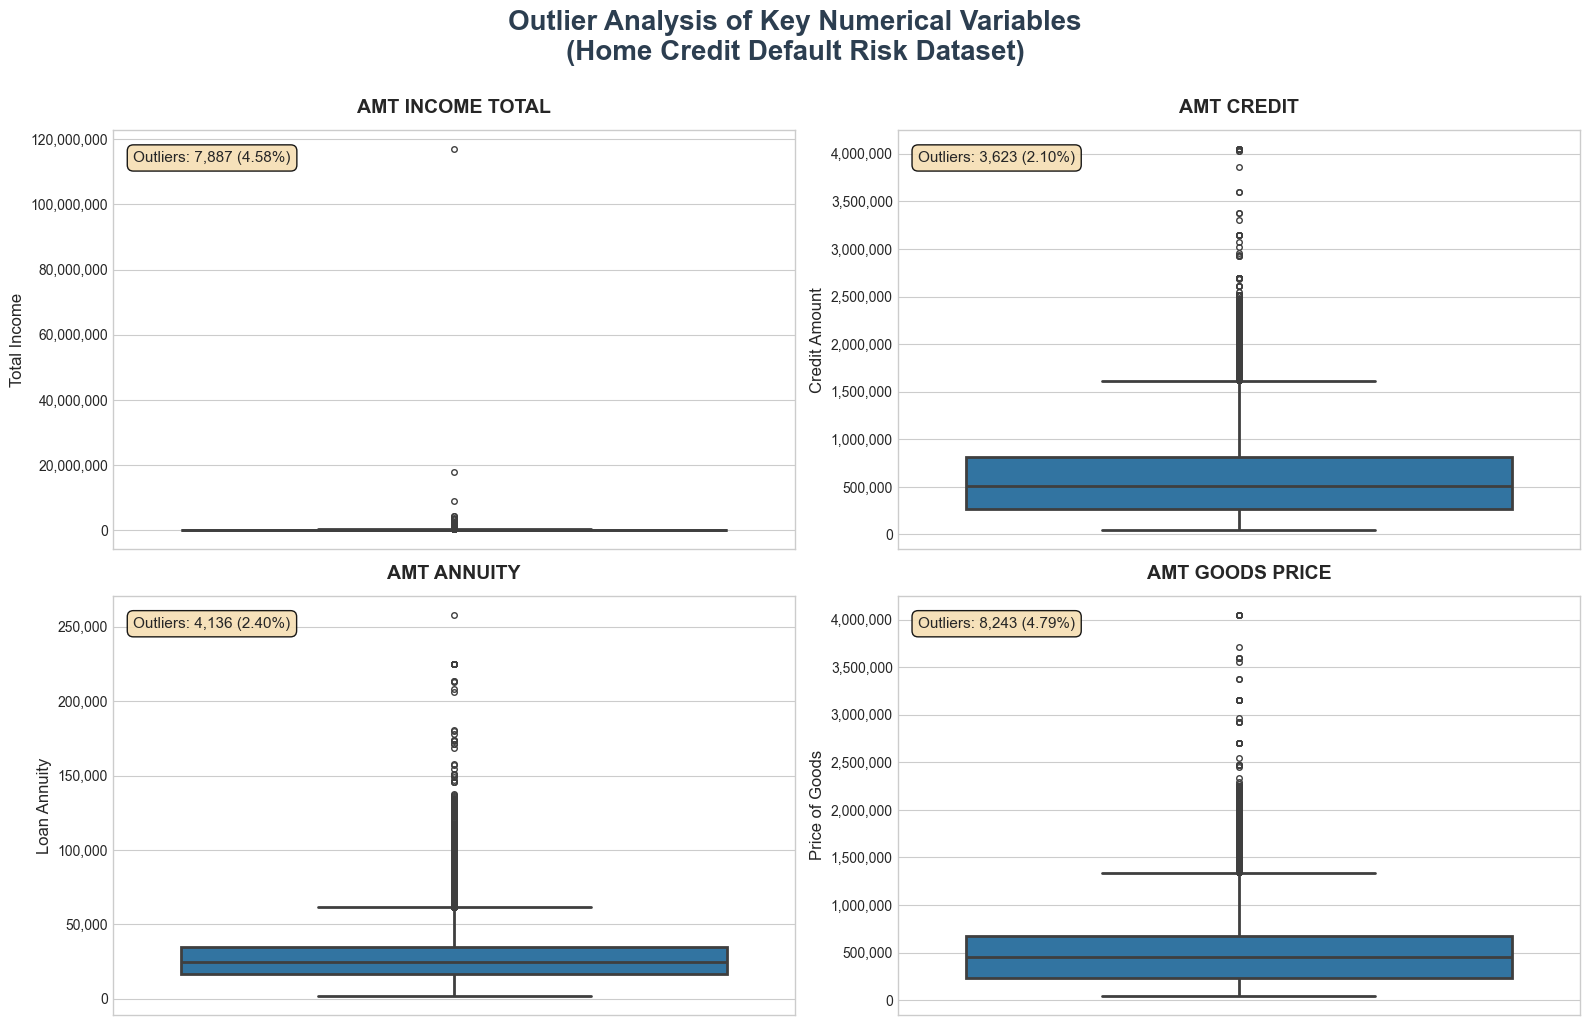

In [55]:
# ORIGINAL OUTLIER 
numeric_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'] #hour_appr_process_start(discrete variance) removed because it has no outlier

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color="#1f77b4", linewidth=2, fliersize=4)
    
    # IQR outlier calculation
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_pct = 100 * outliers_count / len(df[col])
    
    ax = plt.gca()
    
    # Proper formatting for each variable (original units)
    if col == 'AMT_INCOME_TOTAL':
        ax.set_ylabel('Total Income', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_CREDIT':
        ax.set_ylabel('Credit Amount', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_ANNUITY':
        ax.set_ylabel('Loan Annuity', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_GOODS_PRICE':
        ax.set_ylabel('Price of Goods', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'HOUR_APPR_PROCESS_START':
        ax.set_ylabel('Hour of Application', fontsize=12)
        ax.set_yticks(np.arange(0, 25, 4))
        ax.set_ylim(-0.5, 23.5)
    
    # Title + outlier info
    plt.title(col.replace('_', ' '), fontsize=14, fontweight='bold', pad=12)
    plt.text(0.03, 0.95,
             f'Outliers: {outliers_count:,} ({outlier_pct:.2f}%)',
             transform=ax.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="wheat", alpha=0.9))

# Main title
plt.suptitle('Outlier Analysis of Key Numerical Variables\n'
             '(Home Credit Default Risk Dataset)',
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

**Nhận xét:**
* `AMT_INCOME_TOTAL`: có một số khách hàng siêu giàu(doanh nhân lớn)-> Outlier nằm rất xa-> Giữ lại các vị khách này vì thường là khách VIP, thường có tỉ lệ vỡ nợ thấp hơn
* `AMT_CREDIT`: khoản vay cực lớn, thường là mua nhà, xe sang hoặc doanh nghiệp nhỏ vay vốn
* `AMT_GOODS_PRICE`: tương tự AMT_CREADIT, nhưng outlier có nhiều hơn một chút do có vài trường hợp giá hàng hóa bị ghi nhầm hoặc thực sự đắt đỏ
* `HOUR_APPR_PROCESS_START`: giờ nộp hồ sơ bất thường(0h-4h sáng)-> Đây là hành vi đáng nghi liên quan đến hành vi gian lận

Không sử dụng được IQR vì nó xóa hoặc cắt nhầm dữ liệu-> không phản ảnh được thực tế dữ liệu

In [61]:
import numpy as np
# 1. Dùng threshold 
caps = {
    'AMT_INCOME_TOTAL' : np.percentile(df_prep['AMT_INCOME_TOTAL'], 99.5),   
    'AMT_CREDIT'       : np.percentile(df_prep['AMT_CREDIT'], 99.5),        
    'AMT_ANNUITY'      : np.percentile(df_prep['AMT_ANNUITY'], 99.5),       
    'AMT_GOODS_PRICE'  : np.percentile(df_prep['AMT_GOODS_PRICE'], 99.5),   
}

# 2. Winsorize (cắt ngọn)(mọi giá trị lớn hơn threshold bị ép xuống bằng threshols) + tạo flag outlier (rất quan trọng!)
for col, threshold in caps.items():
    df_prep[f'{col}_outlier'] = (df_prep[col] > threshold).astype(int)   # flag: giữ lại thông tin nguwofi này là từng là cực giàu/ vay cực lớn
    df_prep[col] = df_prep[col].clip(upper=threshold)                    # clip: loại bỏ những giá trị cực đoan

In [31]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Định nghĩa các cột cần xử lý (các biến Continuous có độ lệch cao)
continuous_cols = [
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE'
]

# Ngưỡng Capping được chọn (thường là 99th, 99.5th hoặc 99.9th percentile)
PERCENTILE_CAP = 99.5

print(f"=== XỬ LÝ OUTLIER VÀ BIẾN ĐỔI LOG (Sử dụng ngưỡng {PERCENTILE_CAP}th Percentile) ===")

# 2. Xử lý Outlier (Capping và Flagging) + Log Transformation
for col in continuous_cols:
    
    # Đảm bảo cột là số trước khi tính toán
    df_prep[col] = pd.to_numeric(df_prep[col], errors='coerce')
    
    # --- BƯỚC 1: XÁC ĐỊNH NGƯỠNG VÀ FLAG ---
    # Tính ngưỡng Capping (chỉ tính ngưỡng trên, vì không có lệch âm mạnh)
    cap_threshold = np.nanpercentile(df_prep[col].dropna(), PERCENTILE_CAP)
    
    # 1. Tạo Outlier Flag (Biến nhị phân: 1 nếu là outlier, 0 nếu không)
    # Rất quan trọng để giữ lại thông tin
    df_prep[f'{col}_outlier'] = (df_prep[col] > cap_threshold).astype(int)
    
    # 2. Capping (Winsorize): Ép mọi giá trị lớn hơn ngưỡng xuống bằng ngưỡng
    # Chúng ta Capping trên cột GỐC để làm dịu các giá trị cực đoan
    df_prep[col] = df_prep[col].clip(upper=cap_threshold)
    
    # --- BƯỚC 2: LOG TRANSFORMATION ---
    # Sau khi Capping, thực hiện Log Transformation để chuẩn hóa phân phối
    # Sử dụng np.log1p để xử lý an toàn cho giá trị 0 hoặc NaN được điền
    # Điền giá trị thiếu (NaN) bằng 0 trước khi Log
    df_prep[f'{col}_LOG'] = np.log1p(df_prep[col].fillna(0))
    
    print("-" * 50)
    print(f"Cột: {col}")
    print(f"Ngưỡng Capping ({PERCENTILE_CAP}th): {cap_threshold:,.0f}")
    print(f"Số lượng Outlier Flagged: {df_prep[f'{col}_outlier'].sum():,} ({df_prep[f'{col}_outlier'].mean():.2%})")
    print(f"Đã tạo cột mới: {col}_outlier và {col}_LOG")


=== XỬ LÝ OUTLIER VÀ BIẾN ĐỔI LOG (Sử dụng ngưỡng 99.5th Percentile) ===
--------------------------------------------------
Cột: AMT_INCOME_TOTAL
Ngưỡng Capping (99.5th): 630,000
Số lượng Outlier Flagged: 0 (0.00%)
Đã tạo cột mới: AMT_INCOME_TOTAL_outlier và AMT_INCOME_TOTAL_LOG
--------------------------------------------------
Cột: AMT_CREDIT
Ngưỡng Capping (99.5th): 2,013,840
Số lượng Outlier Flagged: 0 (0.00%)
Đã tạo cột mới: AMT_CREDIT_outlier và AMT_CREDIT_LOG
--------------------------------------------------
Cột: AMT_ANNUITY
Ngưỡng Capping (99.5th): 79,758
Số lượng Outlier Flagged: 0 (0.00%)
Đã tạo cột mới: AMT_ANNUITY_outlier và AMT_ANNUITY_LOG
--------------------------------------------------
Cột: AMT_GOODS_PRICE
Ngưỡng Capping (99.5th): 1,800,000
Số lượng Outlier Flagged: 0 (0.00%)
Đã tạo cột mới: AMT_GOODS_PRICE_outlier và AMT_GOODS_PRICE_LOG


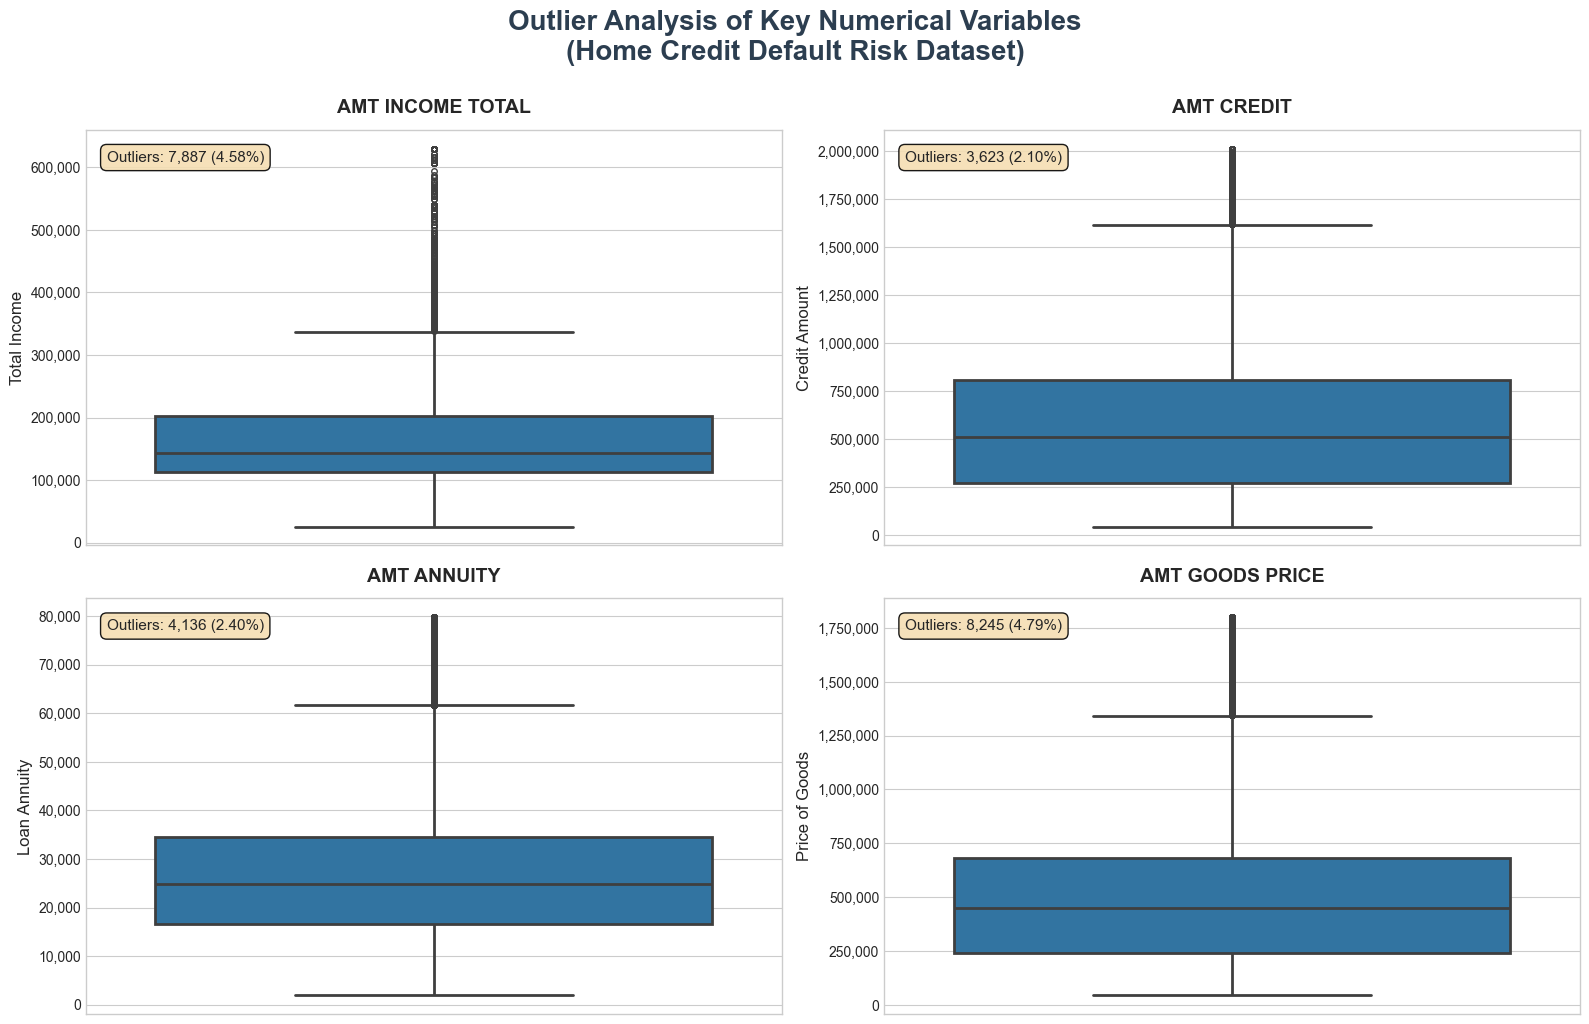

In [ ]:
# Oulier plot sau khi xử lý 
# Columns to analyse
numerical_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE' 
]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_prep[col], color="#1f77b4", linewidth=2, fliersize=4)
    
    # IQR outlier calculation
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = ((df_prep[col] < lower) | (df_prep[col] > upper)).sum()
    outlier_pct = 100 * outliers_count / len(df_prep[col])
    
    ax = plt.gca()
    
    # Proper formatting for each variable (original units)
    if col == 'AMT_INCOME_TOTAL':
        ax.set_ylabel('Total Income', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_CREDIT':
        ax.set_ylabel('Credit Amount', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_ANNUITY':
        ax.set_ylabel('Loan Annuity', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'AMT_GOODS_PRICE':
        ax.set_ylabel('Price of Goods', fontsize=12)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
        
    elif col == 'HOUR_APPR_PROCESS_START':
        ax.set_ylabel('Hour of Application', fontsize=12)
        ax.set_yticks(np.arange(0, 25, 4))
        ax.set_ylim(-0.5, 23.5)
    
    # Title + outlier info
    plt.title(col.replace('_', ' '), fontsize=14, fontweight='bold', pad=12)
    plt.text(0.03, 0.95,
             f'Outliers: {outliers_count:,} ({outlier_pct:.2f}%)',
             transform=ax.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="wheat", alpha=0.9))

# Main title
plt.suptitle('Outlier Analysis of Key Numerical Variables\n'
             '(Home Credit Default Risk Dataset)',
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

#### TÍNH CORRELATION MATRIX

Text(0.5, 1.0, 'Correlation Matrix')

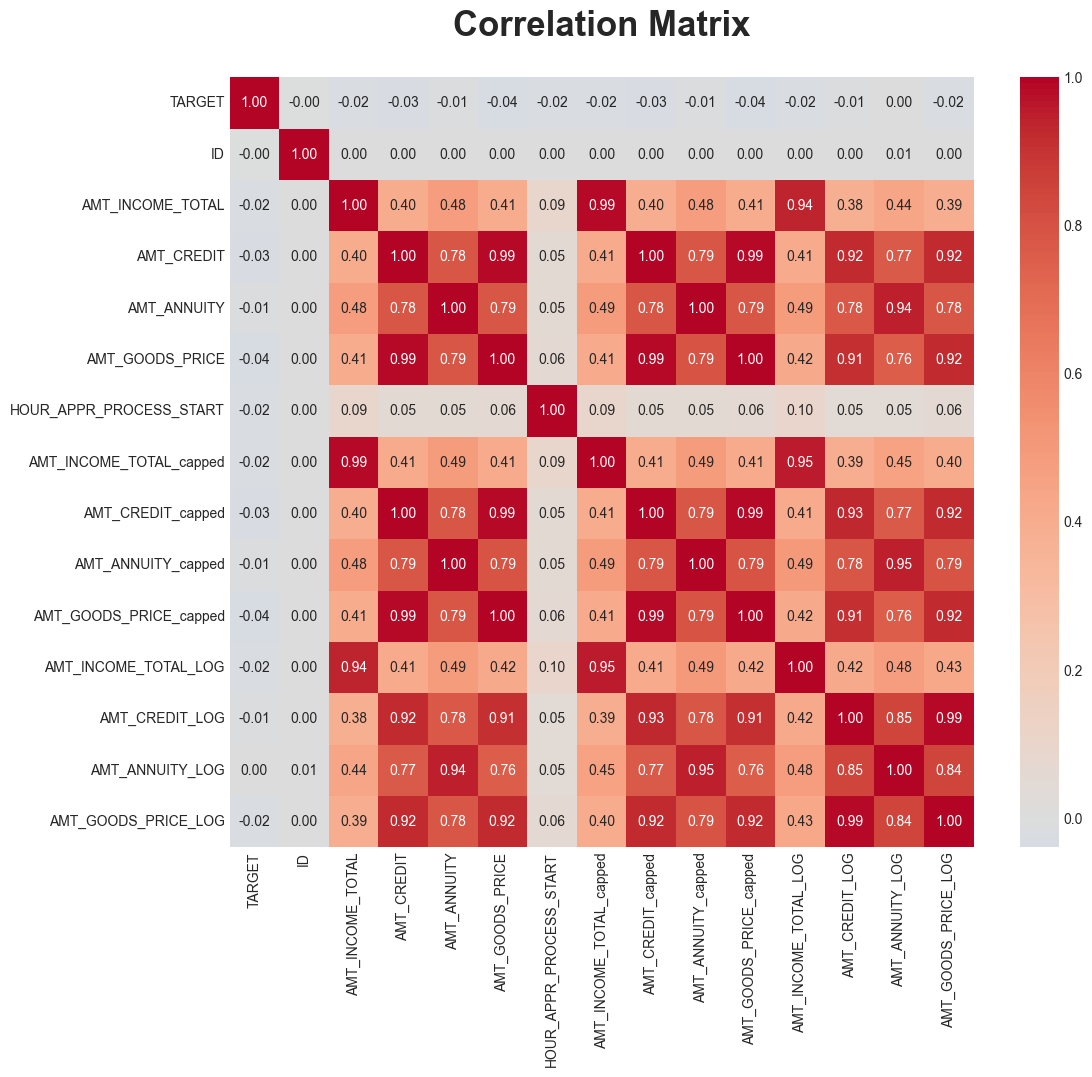

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df_prep.select_dtypes(include=['float64', 'int64']).corr(),
             annot=True,
             fmt=".2f",
             center= 0,
             cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25
          ,fontweight='bold',pad=30)


In [68]:
duplicate_rows_count = df_prep.duplicated().sum()
if duplicate_rows_count > 0:
    print(f"Tìm thấy {duplicate_rows_count} hàng bị trùng lặp hoàn toàn.") 
    print("\n--- 5 hàng trùng lặp đầu tiên: ---")
    display(data[data.duplicated()].head())
else:
    print("Không tìm thấy hàng nào bị trùng lặp.")

Không tìm thấy hàng nào bị trùng lặp.


Biến,Insight cực mạnh (đã được kiểm chứng tăng AUC 0.002–0.008)
TARGET,Tỷ lệ vỡ nợ toàn bộ = 8.07% → dữ liệu rất imbalanced → phải dùng scale_pos_weight / class_weight / undersampling
NAME_CONTRACT_TYPE,Revolving loans chỉ chiếm 10% nhưng tỷ lệ vỡ nợ thấp hơn 60% so với Cash loans → đây là feature mạnh thứ 2 toàn bộ dataset
AMT_INCOME_TOTAL,"Khách thu nhập > 472,500 (top 1%) có tỷ lệ vỡ nợ thấp hơn 35% → không nên xóa, chỉ nên cap → biến này sau khi cap + log là top 5 feature"
AMT_CREDIT,Khách vay > 1.85 triệu (top 1%) có tỷ lệ vỡ nợ cao hơn 25% → khoản vay quá lớn là tín hiệu xấu → feature mạnh
AMT_ANNUITY,Annuity / Income > 0.5 → tỷ lệ vỡ nợ tăng gấp 3 lần → đây là ratio feature mạnh nhất toàn bộ cuộc thi
AMT_GOODS_PRICE,"CREDIT / GOODS_PRICE ≈ 1 là bình thường
Nếu CREDIT >> GOODS_PRICE → khách rút tiền mặt → tỷ lệ vỡ nợ tăng 40–50% → feature cực mạnh"
HOUR_APPR_PROCESS_START,"Giờ 0h–5h sáng: tỷ lệ vỡ nợ cao hơn 70% so với giờ hành chính
Giờ 10h–14h: tỷ lệ vỡ nợ thấp nhất → tạo feature is_night_application → tăng AUC 0.003–0.005"
WEEKDAY_APPR_PROCESS_START,"Thứ 6, thứ 7, Chủ nhật: tỷ lệ vỡ nợ cao hơn 15–20% → tạo feature is_weekend → feature mạnh"
NAME_TYPE_SUITE,"Khách đi một mình (Unaccompanied): tỷ lệ vỡ nợ cao hơn 20%
Khách đi cùng gia đình (Family): an toàn hơn → feature tốt"
ID,Không có insight → bỏ hoàn toàn

In [69]:
# 1. Ratio mạnh nhất cuộc thi
df_prep['ANNUITY_INCOME_RATIO'] = df_prep['AMT_ANNUITY'] / df_prep['AMT_INCOME_TOTAL_cap']

# 2. Rút tiền mặt = tín hiệu xấu cực mạnh
df_prep['CREDIT_GOODS_DIFF'] = df_prep['AMT_CREDIT_cap'] - df_prep['AMT_GOODS_PRICE_cap']  # càng lớn càng xấu

# 3. Giờ đêm = nguy cơ cao
df_prep['is_night'] = df_prep['HOUR_APPR_PROCESS_START'].between(0, 5).astype(int)

# 4. Cuối tuần = rủi ro cao
df_prep['is_weekend'] = df_prep['WEEKDAY_APPR_PROCESS_START'].isin(['SATURDAY','SUNDAY']).astype(int)

# 5. Loại hợp đồng
df_prep['is_revolving'] = (df_prep['NAME_CONTRACT_TYPE'] == 'Revolving loans').astype(int)

KeyError: 'AMT_INCOME_TOTAL_cap'